#PROJECT OVERVIEW

For this project, Economic data was extracted from the U.S. Federal reserve as well as housing data from Zillow and then the data was trained using a Random Forest Classifier to predict if housing prices will go up (or down) in the next three months  

#FILE OVERVIEW 
 
These files were used for the deployment of this project. You can get them by cloning the code repository from the Github link.

CPIAUCSL.csv - US CPI (inflation measure)

RRVRUSQ156N.csv - Rental vacancy rate, quarterly

MORTGAGE30US.csv - Mortgage interest rates, weekly

Metro_median_sale_price_uc_sfrcondo_week.csv - Median sale price for US houses

Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv - Zillow home value index

Let's begin!

In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [134]:
#Loading data using list comprehension and parsing dates from the csv files into a pandas df format
house_files=["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]
dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in house_files]
dfs[0]


,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [135]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [136]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [137]:
#The data from the three data sources have a slightly different timeline so there will be missig values after executing a concatenation
#The rental vacancy rate data is collected quarterly and CPI is monthly  
house_data=pd.concat(dfs, axis=1)
house_data.head(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
1947-06-01,NaN,NaN,22.08
1947-07-01,NaN,NaN,22.23
1947-08-01,NaN,NaN,22.40
1947-09-01,NaN,NaN,22.84


In [138]:
house_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


In [139]:
#Using the ffill() function on the dataframe will eliminate nulls with the assumption that the rates will stay constant for the period that they are collected
house_data = house_data.ffill().dropna()
house_data.head(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.1
1971-04-09,7.31,5.3,40.1
1971-04-16,7.31,5.3,40.1
1971-04-23,7.31,5.3,40.1
1971-04-30,7.29,5.3,40.1
1971-05-01,7.29,5.3,40.3
1971-05-07,7.38,5.3,40.3
1971-05-14,7.42,5.3,40.3
1971-05-21,7.44,5.3,40.3


In [140]:
house_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


In [141]:
#Loading Zillow Price data
zill_data=["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]
dfs2=[pd.read_csv(f) for f in zill_data]

dfs2[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [142]:
dfs2[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


In [143]:
#We want to only read in the first row with US Price data for each dataset and delete the first 5 columns that we don't need. We will be left with the weekly sales price data
# We will then combine the data in the 2 datasets on the month
dfs2 = [pd.DataFrame(df.iloc[0,5:]) for df in dfs2]

for df in dfs2:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [144]:
dfs2[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [145]:
price_data= dfs2[0].merge(dfs2[1], on="month")
price_data.index = dfs2[0].index
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [146]:
# Now that the data is merged on the month, we can emit that row and change the column names 0_x and 0_y as "price" and "value" respectively 
del price_data["month"]
price_data.columns = ["price", "value"]
price_data

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


Preparing data for RandomForestClassifier

In [147]:
#Merging the Zillow price data with the Federal reserve housing data

from datetime import timedelta

house_data.index = house_data.index + timedelta(days=2)

house_data.tail(10)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-06-18,5.78,5.6,295.328
2022-06-25,5.81,5.6,295.328
2022-07-02,5.70,5.6,295.328
2022-07-03,5.70,5.6,295.271
2022-07-09,5.30,5.6,295.271
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271
2022-08-06,4.99,5.6,295.271


In [148]:
price_data = house_data.merge(price_data, left_index=True, right_index=True)
#Renaming Fed Reserve data columns
price_data.columns = ["Interest Rate", "Vacancy Rate", "CPI", "Price", "Value"]
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


EDA

In [149]:
#Calculation of house prices without inflation measure
#Price is the average weekly price data
#Value is the Zillow average value of all houses in the U.S.
price_data["adj_price"] = price_data["Price"] / price_data["CPI"] * 100
price_data["adj_value"] = price_data["Value"] / price_data["CPI"] * 100

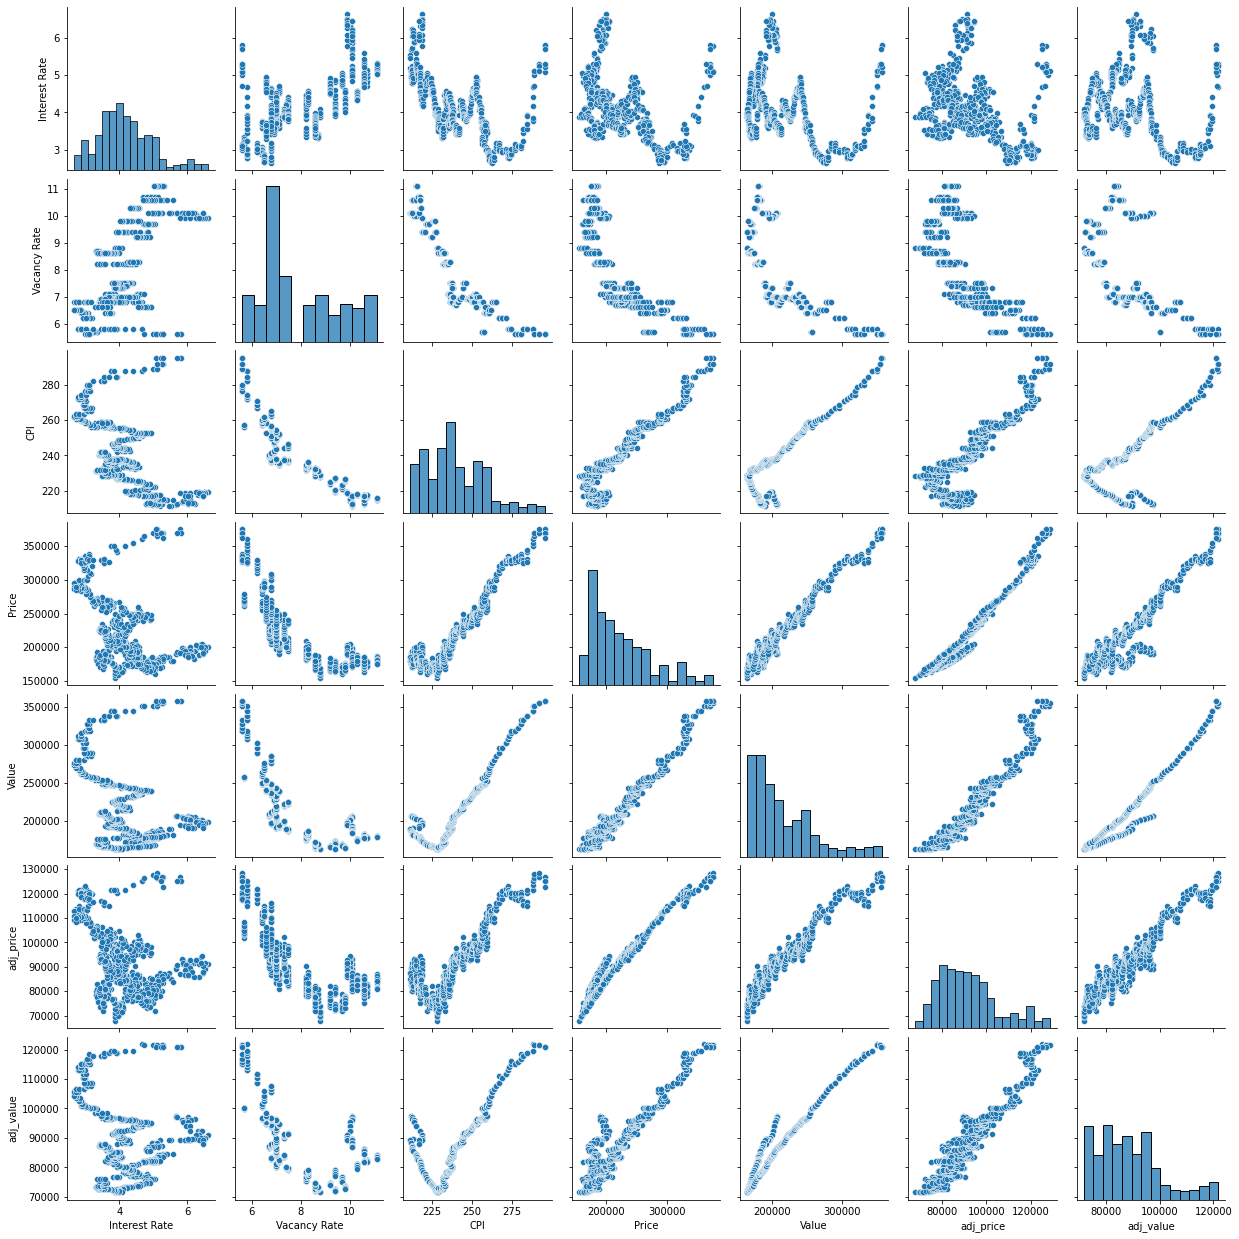

In [150]:
sns.pairplot(price_data) 

<AxesSubplot:>

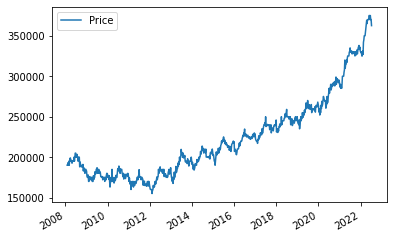

In [151]:
#Time series plot of house prices in the U.S.
price_data.plot.line(y="Price", use_index=True)

<AxesSubplot:>

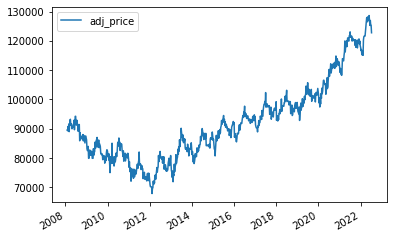

In [152]:
#Time series plot of adjusted price(without inflation)
price_data.plot.line(y="adj_price", use_index=True)

In [153]:
#Setting up the Target for ML prediction
#We want to predict prices for each subsequent quarter (13 weeks)
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [154]:
price_data.dropna(inplace=True)
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


In [155]:
#This next line of code is just to solidify the target column "Increase" column is just showing whether the price went up or down in 3 months 
# Increase=1, decrease=0 
price_data["Increase"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter,Increase
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


In [156]:
cor1=price_data.corr()
cor1

,Interest Rate,Vacancy Rate,CPI,Increase
Interest Rate,1.000000,0.712174,-0.680555,-0.150303
Vacancy Rate,0.712174,1.000000,-0.906184,-0.187935
CPI,-0.680555,-0.906184,1.000000,0.186610
Increase,-0.150303,-0.187935,0.186610,1.000000


<AxesSubplot:>

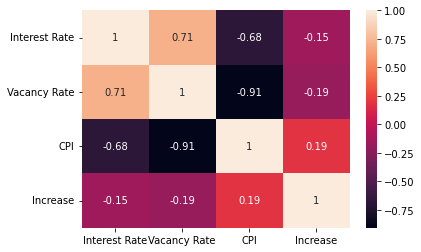

In [157]:

sns.heatmap(cor1,annot=True)

In [159]:
#Value counts of how many weeks the prices increased and decreased
price_data["Increase"].value_counts()


1    379
0    343
Name: Increase, dtype: int64

RandomForestClassifier Training

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [161]:
predictors=['Interest Rate','Vacancy Rate','adj_price','adj_value']
target='Increase'

In [162]:
START = 260 #5 YEARS OF DATA
STEP = 52 #52 WKS IN A YEAR
#Train-Test split
def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds= rf.predict(test[predictors])
    return preds
    
#Creating a Backtesting Engine for Time series data
def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds,accuracy_score(data.iloc[START:][target], preds)

In [163]:
#Running Backtest
preds, accuracy = backtest(price_data, predictors, target)

In [164]:
preds

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [165]:
accuracy

0.5952380952380952

Improving the accuracy of the Model by adding more features

In [166]:
yearly = price_data.rolling(52, min_periods=1).mean()

In [167]:
yearly_ratios = [f"{p}_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [168]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter,Increase,Interest Rate_year,Vacancy Rate_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1,0.999119,1.000000,0.998793,0.998793
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1,1.005272,1.000000,1.009662,0.999195
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1,1.045435,1.000000,0.995075,0.999396
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1,1.063032,1.000000,1.016948,0.993996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1,1.235955,0.977317,1.021141,1.049231
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1,1.326140,0.980494,1.019749,1.047093
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1,1.397289,0.983692,1.03262,1.044965
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1,1.462275,0.986911,1.045474,1.062065


In [169]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [170]:
#Improved Accuracy
accuracy

0.6536796536796536

In [171]:
#Visual Diagnostics of our prediction
#when prediction match is True, the graph will be coloured blue
#when prediction match is False, the graph will be coloured blue 
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "blue"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='adj_price'>

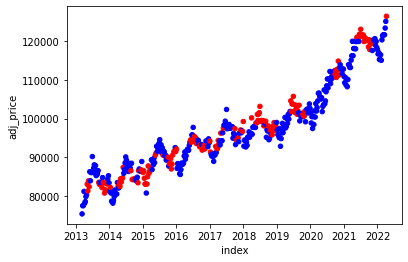

In [172]:

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [173]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [174]:
result["importances_mean"]

array([0.17451524, 0.15540166, 0.27576177, 0.34861496])

In [175]:
predictors

['Interest Rate', 'Vacancy Rate', 'adj_price', 'adj_value']

Conclusion

Overall the model gave a fairly good prediction accuracy (65%) of quarterly housing prices. The accuracy could be improved by adding even more features to the model such as stock market indicators and other house pricing data from data sources. The model could also be localized to specific regions in the United States from the Zillow dataset which may produce more accurate predictions as well.

